In [209]:
# IMPORT DATA

import pandas as pd
tweets=pd.read_csv('https://raw.githubusercontent.com/AnubhavJohri/Twitter-US-Airline-Sentiment-Analysis/master/Twitter%20US%20Airline%20Sentiment%20Analysis/Dataset/training_data.csv')
tweets.head()

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567900433542488064,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada)
1,569989168903819264,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada)
2,568089179520954368,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada)
3,568928195581513728,negative,Southwest,NaN,amccarthy19,NaN,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,NaN,2015-02-20 16:20:26 -0800,NaN,Atlantic Time (Canada)
4,568594180014014464,negative,United,NaN,J_Okayy,NaN,0,@united so our flight into ORD was delayed bec...,NaN,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada)


In [210]:
# REMOVE PUNCTUATION AND STOPWORDS

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer, WordNetLemmatizer

# STOP WORDS
stopwords = stopwords.words('english')
Addl_StopWords = ['United', 'Delta', 'Southwest', 'JetBlue','flight', 'airline', 'thank', 'thanks', 'guy', 'girl']
for word in Addl_StopWords:
    stopwords.append(word)

#print(stopwords)

# STEMMER & LEMMATIZER
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# CLEAN TWEET TEXT

clean_data = []

for word in range(len(tweets['text'])):
    #REMOVE PUNCTUATION
    tweet = re.sub('[^a-zA-Z]',' ',tweets['text'].iloc[word])
    #MAKE EVERYHTING LOWERCASE
    tweet=tweet.lower().split()
    #ELIMINATE STOPWORDS
    tweet=[lemmatizer.lemmatize(word) for word in tweet if (word not in stopwords)]
    #CREATE LIST OF STOPWORDS
    tweet=' '.join(tweet)
    clean_data.append(tweet)

tweets['clean_text'] = clean_data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BennettCelichowski\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package stopwords is already up-to-date!


In [211]:
# IMPORT PLOTTING LIBS

from wordcloud import WordCloud
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [212]:
# WORD CLOUD FUNCTION

def Airline_Wordcloud(airline_name, sentiment):

    sorted_data = tweets[(tweets['airline']==airline_name) & (tweets['airline_sentiment']==sentiment)]

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(sorted_data['clean_text'].to_string())


    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    
    plt.show()

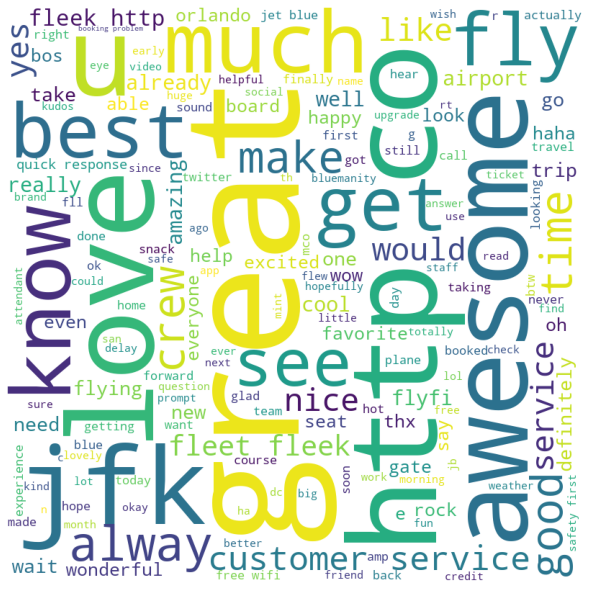

In [213]:
# WORDCLOUD

Airline_Wordcloud('Delta', 'positive')

In [214]:
# IMPORT AFINN MODEL TO EVALUATE POSTIIVE NEGATIVE SENTIMENT OF RAW TWEETS

from afinn import Afinn


# SET AFINN DEFAULT AS ENGLISH
afinn = Afinn(language = 'en')

In [215]:
# ADD AFINN SCORE To DATFRAME 

def AFINN(data):

    afin_lst = []



    for word in tweets['clean_text']:
        
        # NORMALIZE FOR TWEET LENGTH 
        adj_AFINN = (afinn.score(word)/ len(word.split()))
        afin_lst.append(adj_AFINN)


    return afin_lst

tweets['AFINN'] = AFINN(tweets)



#tweets.head()


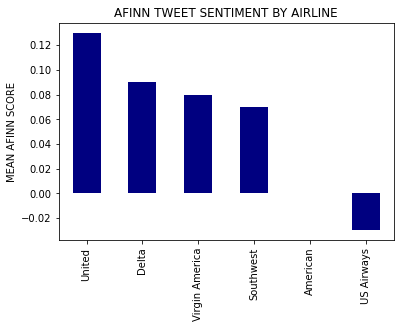

In [216]:
# TWEET SENTIMENT BY AIRLINE  

AFINN_Sentiment_TBL = round(\
    pd.pivot_table(tweets, index= ['airline'], values='AFINN', aggfunc = 'mean'  )\
    .sort_values(ascending=False, by = 'AFINN')\
        ,2)

# VISUALIZE
AFINN_Sentiment_TBL.plot(kind='bar', color = 'navy', legend = False )
plt.ylabel('MEAN AFINN SCORE')
plt.xlabel('')
plt.title('AFINN TWEET SENTIMENT BY AIRLINE')
plt.show()


In [217]:
# VADER SENTIMENT  - IMPORT LIBS

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()



In [218]:
# VADER FUNCTION

def Vaderize(data):
    Vader_sentiment = data['text'].apply(analyzer.polarity_scores)
    Vader_df = pd.DataFrame(Vader_sentiment.tolist())

    return Vader_df


In [219]:
# COMBINE DATASETS

tweets_2 = pd.concat([tweets, Vaderize(tweets)], axis = 1)

tweets_2.head()

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text,AFINN,neg,neu,pos,compound
0,567900433542488064,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada),southwestair scheduled morning day fact yes su...,0.000000,0.076,0.837,0.087,0.0772
1,569989168903819264,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada),southwestair seeing worker time time going bey...,0.300000,0.000,0.750,0.250,0.7901
2,568089179520954368,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada),united flew ord miami back great crew service leg,0.444444,0.000,0.552,0.448,0.8893
3,568928195581513728,negative,Southwest,NaN,amccarthy19,NaN,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,NaN,2015-02-20 16:20:26 -0800,NaN,Atlantic Time (Canada),southwestair dultch horse radish,0.000000,0.000,1.000,0.000,0.0000
4,568594180014014464,negative,United,NaN,J_Okayy,NaN,0,@united so our flight into ORD was delayed bec...,NaN,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada),united ord delayed air force one last sbn min ...,0.000000,0.048,0.890,0.063,0.1154


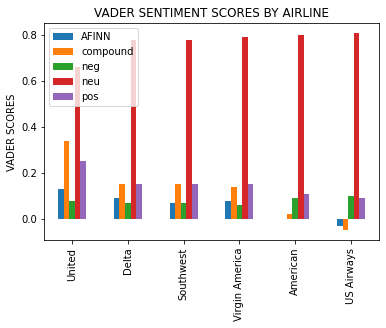

In [237]:
# PIVOT DATA 
# Compound is the normalized, weighted composite score

VADER_Sentiment_TBL = round(\
    pd.pivot_table(tweets_2, index= ['airline'], 
    values= ['neg','neu','pos','compound'], 
    aggfunc = 'mean'  ).sort_values(by='compound', ascending=False)
        ,2)

VADER_Sentiment_TBL.plot(kind = 'bar')
plt.xlabel('')
plt.ylabel('VADER SCORES')
plt.title('VADER SENTIMENT SCORES BY AIRLINE')
plt.legend(loc = 'upper left')

<AxesSubplot:xlabel='neg', ylabel='pos'>

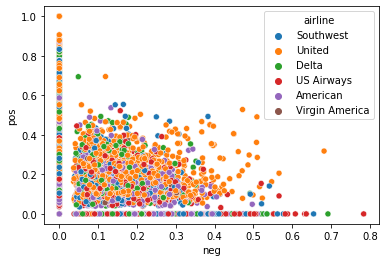

In [241]:
sns.scatterplot(data = tweets_2, x='neg', y='pos', hue='airline')


In [239]:
Sentiment_Summary_TBL = round(\
    pd.pivot_table(tweets_2, index= ['airline'], 
    values= ['neg','neu','pos','compound', 'AFINN'], 
    aggfunc = 'mean'  ).sort_values(by='AFINN', ascending=False)
        ,2)

Sentiment_Summary_TBL

,AFINN,compound,neg,neu,pos
airline,,,,,
United,0.13,0.34,0.08,0.66,0.25
Delta,0.09,0.15,0.07,0.78,0.15
Virgin America,0.08,0.14,0.06,0.79,0.15
Southwest,0.07,0.15,0.07,0.78,0.15
American,0.00,0.02,0.09,0.80,0.11
US Airways,-0.03,-0.05,0.10,0.81,0.09
